# <div style = 'background-color:#616150'> <center><font color='#8FAD88'>Predicción de riesgo crediticio mediante regresión logística</div>
---

Los criterios para la aprobación o rechazo de créditos en entidades con esta actividad combinan la evaluación cuantitativa (números) y cualitativa (comportamiento, antecedentes, garantías).La combinación de ambos enfoques permite alcanzar una visión más completa del solicitante y definir con mayor precisión la probabilidad de cumplimiento, ajustando así la decisión crediticia al perfil de riesgo que la entidad está dispuesta a asumir.
Los puntos a evaluar son:

**1. Capacidad de pago del solicitante:** Este es el criterio más importante, aqui se analiza si el cliente solicitante puede cumplir con las cuotas según sus ingresos y gastos declarados/detectados. Los indicadores a tener en cuenta:

- a) Ingreso neto mensual (comprobable, por eso se solicitan recibos de sueldos para empleados o certificado de ingresos emitidos por contador publico en el caso de monotributistas/responsable inscripto en el caso de Argentina).

- b) Relación Cuota/Ingreso [RCI]: Que por lo general no debe superar el 30–40 %. No debe confundirse la Relación Cuota/Ingreso (RCI) con el indicador DTI (Debt-to-Income Ratio) presente en el dataframe, si bien ambos ratios miden la proporción del ingreso afectada por obligaciones financieras, su alcance es distinto. La RCI considera exclusivamente la cuota del nuevo crédito solicitado en relación con el ingreso neto mensual del solicitante. El DTI, en cambio evalúa la carga total de endeudamiento, incluyendo todas las deudas vigentes.


$$
RCI = \left( \frac{\text{Cuota mensual}}{\text{Ingreso neto}} \right) \times 100
$$

- c) Endeudamiento total: Es el porcentaje de ingresos comprometidos en otras deudas, puede darse el caso que ya tenga otros creditos, tarjetas de credito, etc que afectarian la relación RCI del punto anterior.

- d) Historial laboral o continuidad de ingresos: Tambien se analiza la estabilidad y previsibilidad de los ingresos del solicitante. En el caso de la antigüedad laboral cuando se tiene entre 6 a 12 meses minimo ya se considera una estabilidad mínima que evitaria riesgos. Tambien se analizan si ha tenido cambios frecuentes de empleo (si fueron por mejora o por inestabilidad). Adicionalmente se puede considerar la actividad económica del empleador ya que hay rubros con alta rotación o estacionalidad que pueden considerarse de mayor riesgo (como por ejemplo rubros como campo, construcción, turismo, gastronomía, etc.).

**2. Solvencia patrimonial:** Se evalúa el respaldo económico del solicitante, se busca un patrimonio positivo (quiere decir más activos que deudas) y líquido (que en caso de contingencia se puedan realizar/liquidar rápido para afrontar deudas) que respalden el préstamo.

- Activos declarados (inmuebles, vehículos, inversiones).
- Pasivos existentes (otras deudas).
- Garantías ofrecidas: reales (hipoteca, prenda) o personales.

**3. Comportamiento crediticio:** Se analiza el historial de cumplimiento del solicitante. Las fuentes tipicas de consulta son:

- BCRA – Central de Deudores: categoría 1 (mejor situación crediticia o normal) a la 5ta (deudor irrecuperable).
- Veraz / Nosis / Otros: Empresas privadas de información crediticia.
- Historial interno del propio banco o entidad financiera: Un cliente con atrasos o moras anteriores suele ser rechazado o aprobado con condiciones más estrictas como puede ser un menor monto o una tasa mayor para cubrir el riesgo.

**4. Finalidad del crédito:** Se tiene en cuenta el destino del credito:

- Productivo: Como por ejemplo para inversión, compra de maquinarias, capital de trabajo. Generalmente tienen una mejor evaluación (puesto que se destina a adquirir bienes que en definitiva mejoran la solvencia patrimonial en caso de una contingencia).
- Consumo o gastos personales: Implican un nivel de riesgo crediticio más elevado, dado que generalmente no se asocian a la adquisición de bienes durables o activos que permitan mitigar el riesgo de incobrabilidad.

**5. Scoring crediticio (modelo cuantitativo):** En la actualidad, muchas entidades financieras utilizan modelos automáticos para la evaluación crediticia de personas y empresas. Estos modelos permiten estimar la probabilidad de incumplimiento (Probability of Default, PD), es decir, la probabilidad de que un solicitante no cumpla con sus obligaciones de pago dentro de un determinado horizonte temporal.

Para ello se emplean metodologías estadísticas y de aprendizaje automático (Machine Learning), que analizan grandes volúmenes de datos históricos de clientes, variables financieras, demográficas y de comportamiento crediticio. Entre los métodos más tradicionales se encuentra la Regresión Logística, ampliamente utilizada por su capacidad de interpretar los factores que influyen en el riesgo de incumplimiento.
Variables mas comunes:
- Edad
- Ingreso
- Monto solicitado
- Historial crediticio
- Tipo de empleo
- Relación deuda/ingreso

Tras aplicar los modelos de evaluación, se compara el score obtenido con un umbral de referencia: si el puntaje supera dicho límite, el crédito se aprueba; de lo contrario, se rechaza.

**6. Políticas internas y grado de exposición al riesgo:** Cada entidad definira sus límites, montos máximos en cada segmento, tasas, rubros o zonas que excluyen y reglas especiales para nuevos clientes o reincidentes.

---

En el presente notebook se dispone de una base de datos con información histórica de solicitudes de crédito, estructurada en los siguientes campos:

* Income: nivel de ingreso del solicitante.
* Credit_Score: puntaje crediticio basado en su comportamiento financiero.
* Loan_Amount: monto solicitado del préstamo.
* DTI_Ratio: relación deuda/ingreso (Debt-to-Income Ratio).
* Employment_Status: situación laboral del solicitante (empleado, desempleado).
* Approval: indicador que muestra si la solicitud fue aprobada (1) o rechazada (0).

A partir de estas variables, se realizará un análisis cuantitativo orientado a comprender los factores que influyen en la aprobación o rechazo de un crédito.
El objetivo es desarrollar un modelo de Regresión Logística que permita estimar la probabilidad de aprobación en función de los atributos del solicitante y, a su vez, evaluar la importancia de cada variable en la decisión crediticia.






#### Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Preparación y limpieza de los datos](#0)<br>
2.  [Analisis exploratorio de los datos](#1)<br>
3.  [Modelado y evaluación](#2) <br>
4.  [Concluciones](#3) <br>

</div>

## <div style = 'background-color:black'> <center><font color='white'>① Preparación y limpieza de los datos </font></div> <a id="0"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore") # Filtrar avisos

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data.csv")
df.sample(5)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
1612,I need money to cover unexpected legal expense...,160127,803,105273,6.82,unemployed,Rejected
7459,I need financial help to build my dream home i...,29744,414,20420,82.18,employed,Rejected
10742,I need money to purchase a food truck and star...,177699,847,84461,26.15,employed,Approved
2372,I need money to pay for a vocational training ...,111857,372,37204,17.73,employed,Rejected
3009,I want to make home improvements like installi...,142471,381,2394,24.86,employed,Rejected


In [3]:
# Por razones de simplicidad elimino esta columna.
df = df.drop(columns=['Text'])

In [4]:
# Cambio nombre de las columnas.
headers = ["Ingreso", "Score_Credito", "Monto_Deuda", "Deuda/Ingreso", "Empleo", "Credito"]
df.columns = headers

In [5]:
# Convierto los resultados de las últimas columnas a valores numéricos, ya que hay solo dos posibles resultados, 0 y 1 tanto
# si es para el valor "Aprobado" y "Rechazado" como con la otra columna donde los valores son "Empleado" y "Desempleado"
df.Credito = df.Credito.replace(['Rejected'], 0)
df.Credito = df.Credito.replace(['Approved'], 1)

df.Empleo = df.Empleo.replace(['unemployed'], 0)
df.Empleo = df.Empleo.replace(['employed'], 1)

In [6]:
df.sample(5)

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
5611,131319,681,79263,25.90,0,0
12279,57589,695,36166,27.40,0,0
23150,185613,838,83003,13.07,0,0
18794,175977,519,109201,3.66,0,0
1051,22826,780,17798,152.26,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ingreso        24000 non-null  int64  
 1   Score_Credito  24000 non-null  int64  
 2   Monto_Deuda    24000 non-null  int64  
 3   Deuda/Ingreso  24000 non-null  float64
 4   Empleo         24000 non-null  int64  
 5   Credito        24000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


In [8]:
df.describe()

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167,0.499708,0.163875
std,51729.677627,159.227621,34666.604785,32.322471,0.500010,0.370170
min,20001.000000,300.000000,1005.000000,2.530000,0.000000,0.000000
25%,65635.750000,437.000000,16212.000000,14.507500,0.000000,0.000000
50%,110464.000000,575.000000,35207.000000,24.860000,0.000000,0.000000
75%,155187.000000,715.000000,65622.750000,41.840000,1.000000,0.000000
max,200000.000000,850.000000,158834.000000,246.330000,1.000000,1.000000


In [9]:
df.isnull().sum() # Para ver cuantos valores nulos hay en cada campo.

Ingreso          0
Score_Credito    0
Monto_Deuda      0
Deuda/Ingreso    0
Empleo           0
Credito          0
dtype: int64

## <div style = 'background-color:black'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div><a id="1"></a>

In [10]:
df.Empleo.value_counts()

Empleo
0    12007
1    11993
Name: count, dtype: int64

In [11]:
conteo = df.Empleo.value_counts()

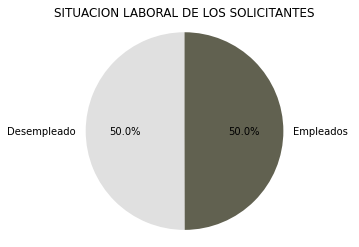

In [12]:
etiquetas = ['Empleados' if val == 1 else 'Desempleado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('SITUACION LABORAL DE LOS SOLICITANTES')
plt.axis('equal')  # Mantener forma de círculo

plt.show()

In [13]:
df.Credito.value_counts()

Credito
0    20067
1     3933
Name: count, dtype: int64

In [14]:
conteo = df.Credito.value_counts()

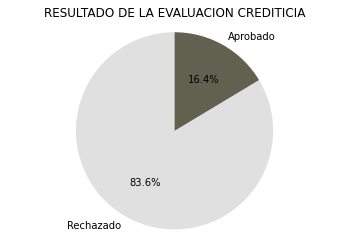

In [15]:
etiquetas = ['Aprobado' if val == 1 else 'Rechazado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('RESULTADO DE LA EVALUACION CREDITICIA')
plt.axis('equal')  # Mantener forma de círculo

plt.show()

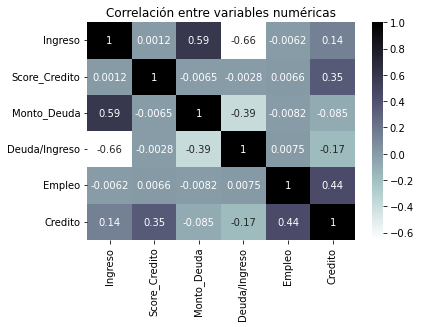

In [16]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='bone_r')
plt.title("Correlación entre variables numéricas")
plt.show()


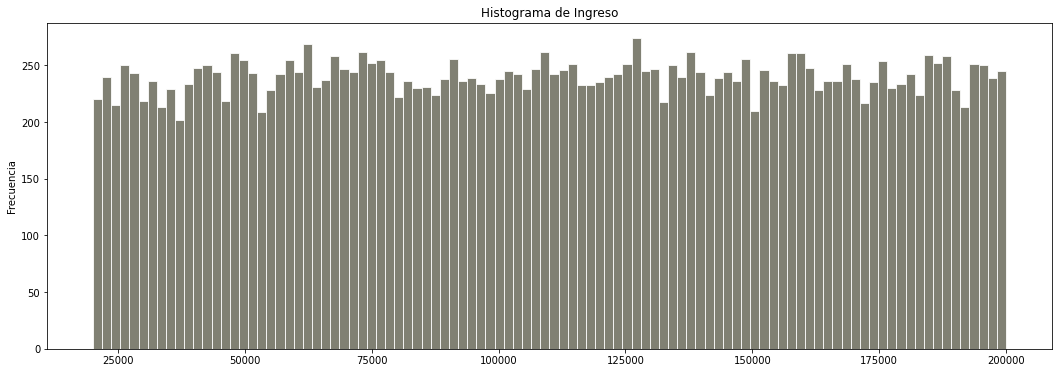

In [17]:
df["Ingreso"].hist(grid=False, bins=100, color="#616150", figsize=(18,6), edgecolor="white", alpha=0.8)
plt.title("Histograma de Ingreso")  
plt.ylabel("Frecuencia")           
plt.show()

Evidencio una falta de concentración que puede indicar que el conjunto de datos abarca distintos segmentos socioeconómicos. En términos de riesgo, esta distribución sin sesgo fuerte implica que la muestra no está dominada por un único perfil económico
En resumen la muestra incluye solicitantes con niveles de ingreso variados y no esta segmentada.

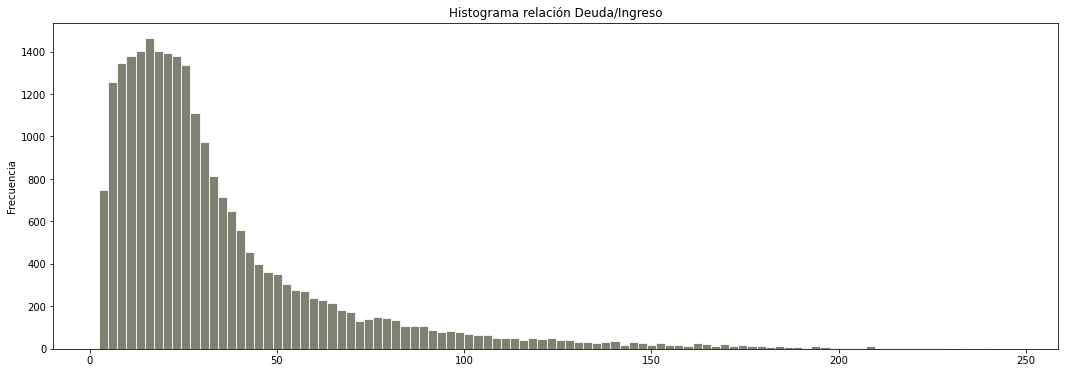

In [18]:
df["Deuda/Ingreso"].hist(grid=False, bins=100, color="#616150", figsize=(18,6), edgecolor="white", alpha=0.8)
plt.title("Histograma relación Deuda/Ingreso")  
plt.ylabel("Frecuencia")           
plt.show()

Según el histograma de la relación Deuda/Ingreso [DTI] (Debt-to-Income Ratio), se observa que la mayoría de los solicitantes destina una proporción reducida de sus ingresos al pago de deudas.
Esta concentración de valores en los niveles bajos del indicador refleja un perfil de endeudamiento prudente, generalmente asociado a menor riesgo.

En los rangos más altos del DTI (zona derecha del gráfico), la densidad de casos es baja, lo que indica que pocos clientes presentan niveles elevados de endeudamiento.

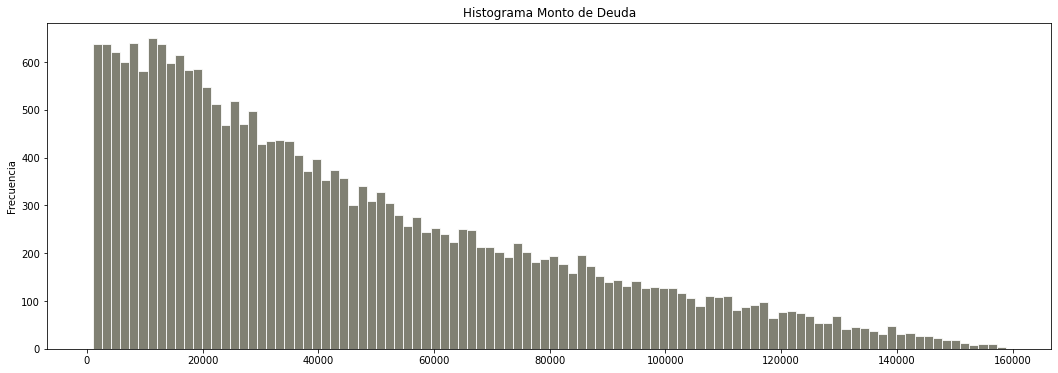

In [19]:
df["Monto_Deuda"].hist(grid=False, bins=100, color="#616150", figsize=(18,6), edgecolor="white", alpha=0.8)
plt.title("Histograma Monto de Deuda")  
plt.ylabel("Frecuencia")           
plt.show()

Esta distribución indica que el conjunto de clientes analizado mantiene niveles de endeudamiento controlados, lo que se asocia a menor riesgo crediticio y mayor capacidad para asumir nuevas obligaciones, presenta una distribución asimétrica positiva (sesgo a la derecha).

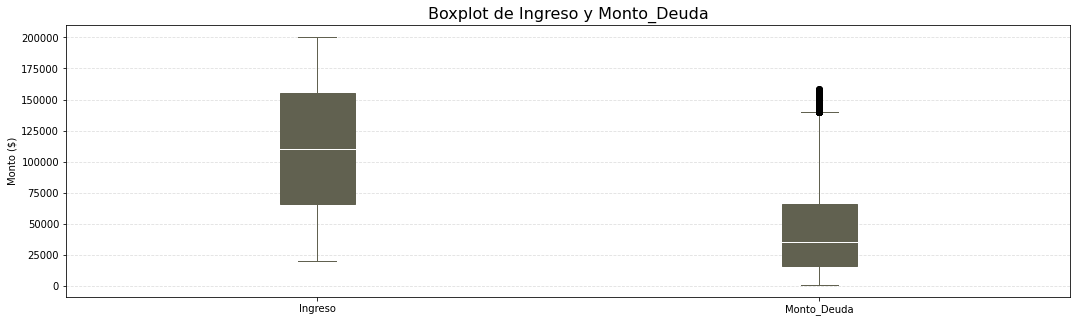

In [20]:
df[['Ingreso','Monto_Deuda']].plot(
    kind='box',
    figsize=(18,5),
    color=dict(boxes='#616150', whiskers='#616150', medians='white', caps='#616150'),
    patch_artist=True
)

plt.title("Boxplot de Ingreso y Monto_Deuda", fontsize=16)
plt.ylabel("Monto ($)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

Puede interpretarse como una cartera financieramente sana, donde los ingresos superan holgadamente las obligaciones.
En la caja correspondiente a “Ingreso”, la línea central color blanca (mediana) se encuentra aproximadamente en el centro, lo que indica que la distribución de ingresos es equilibrada y que la mayoría de los clientes percibe ingresos cercanos al valor promedio.
Con respecto a la caja correspondiente al campo "Monto_Deuda" se puede ver que la mayoría de los clientes tiene niveles de deuda bastante similares, sin tanta dispersión como en los ingresos. La mayoría de las deudas se concentran en valores bajos, con una menor proporción de clientes con deudas elevadas (por eso su mediana es menor a la media. En el extremo superior del bigote se observan algunos casos con deudas notablemente superiores al promedio, aunque aún dentro del rango considerado normal (no outliers).
Posteriormente, la línea negra más gruesa marca los valores fuera del rango esperado, correspondientes a clientes con niveles de endeudamiento significativamente más altos que el resto, identificados como outliers.

## <div style = 'background-color:Black'> <center><font color='white'>③ Modelado y evaluación </font></div><a id="2"></a>

## ❑ Regresión Logística

La Regresión Logística se usa principalmente cuando queremos predecir una probabilidad de que algo ocurra. De forma simplificada puedo partir de la formula de regresion lineal $$ Y=A⋅X+B $$

Pero el problema que se presenta con esta fórmula es que el valor Y puede adoptar valores tanto positivos como negativos y eso no es un resultado optimo si lo que se busca es una probabilidad (que debe estar entre 0 y 1).
La regresión logística resuelve este problema aplicando la función sigmoidea (o logística) sobre la combinación lineal de las variables:
$$p = \frac{1}{1 + e^{-Y}}$$
donde:
- p es la probabilidad de que ocurra el evento (por ejemplo, que el crédito se apruebe).
- 𝑒 es el número de Euler (~2.718), es una constante matemática.
- 𝐴 (cuanto aumenta Y ante un cambio de unidad en X) y 𝐵 (el valor de Y cuando X=0) son los coeficientes que ajusta el modelo.
- 𝑋 puede ser una variable o varias (en este dataset ingresos, score de crédito, deuda, etc.).

La función sigmoidea garantiza que 𝑝 siempre esté entre 0 y 1.

Una vez que esta calculado el valor 𝑝, el modelo puede decidir: 
- **[1]** (Aprobado)  si p≥0.5 
- **[0]** (Rechazado) si p<0.5

NOTA: Generalmente, el umbral se establece en 0,5 aunque es posible ajustarlo según las necesidades del modelo o del análisis.



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [22]:
df.sample()

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
5287,89702,428,30199,50.17,1,0


In [23]:
X = df[['Score_Credito']]  # variable independiente (predictora) por ahora uso 1 sola variable
y = df['Credito']          # variable dependiente (objetivo)

In [24]:
from sklearn.preprocessing import StandardScaler # Escalar valores para que todos tengan la misma importancia.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
modelo = LogisticRegression(class_weight='balanced') # Balanceados los pesos
modelo.fit(X_train, y_train)  # entrenar el modelo

LogisticRegression(class_weight='balanced')

In [27]:
y_pred = modelo.predict(X_test) # hacer que formule predicciones el modelo

In [28]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# La matriz es
#           Prediccion=0     Prediccion=1
#Real=0       TN (true neg)  FP (false posit)
#Real=1       FN (false neg) TP (true posit)

Matriz de confusión:
[[2672 1324]
 [ 215  589]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      3996
           1       0.31      0.73      0.43       804

    accuracy                           0.68      4800
   macro avg       0.62      0.70      0.60      4800
weighted avg       0.82      0.68      0.72      4800



<div class="alert alert-warning">El modelo predice mejor los rechazos que las aprobaciones. Los falsos positivos son riesgo de sobreaprobar clientes si se usara este modelo directamente. En resumen el modelo es conservador para aprobaciones, pero necesita mejoras si se quiere confiar en las predicciones para aprobar créditos.

Adicionalmente se puede decir que el dataset está desbalanceado esto explica que las métricas de clase 1 sean bajas en precision.
</div>

In [29]:
x_range = np.linspace(X['Score_Credito'].min(), X['Score_Credito'].max(), 300).reshape(-1, 1) # definir rango de valores

In [30]:
y_prob = modelo.predict_proba(x_range)[:, 1] # determinar la probabilidad que de 1.

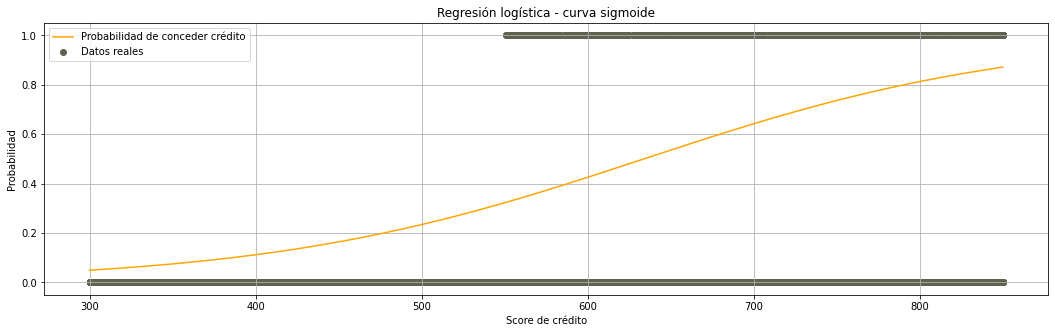

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.plot(x_range, y_prob, label='Probabilidad de conceder crédito', color='orange')
plt.scatter(X_test, y_test, color='#616150', label='Datos reales')
plt.xlabel('Score de crédito')
plt.ylabel('Probabilidad')
plt.title('Regresión logística - curva sigmoide')
plt.grid(True)
plt.legend()
plt.show()

La forma sigmoide muestra que con valores bajos del score crediticio la probabilidad de aprobar es cercana a 0. Con valores altos, la probabilidad se acerca a 1. Los puntos grises (en este caso forman una linea continua) son los datos reales tanto de valores 0 y 1 (rechazado/aprobado). Este grafico permite comparar como el modelo intenta ajustarse a la realidad.

Todo este cálculo se realizó utilizando únicamente el campo Score_Credito para graficar la curva y que se entienda como trabaja, ahora se agregaran los demas campos para ver cómo varían los resultados.

In [32]:
X = df[['Score_Credito', 'Ingreso', 'Monto_Deuda', 'Deuda/Ingreso', 'Empleo' ]]  # variables independientes  
y = df['Credito']          # variable dependiente (objetivo)

In [33]:
from sklearn.preprocessing import StandardScaler # Escalar valores para que todos tengan la misma importancia.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X_train, y_train)  # entrenar el modelo

LogisticRegression(class_weight='balanced')

In [36]:
y_pred = modelo.predict(X_test) # hacer que formule predicciones el modelo

In [37]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[3294  702]
 [  51  753]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      3996
           1       0.52      0.94      0.67       804

    accuracy                           0.84      4800
   macro avg       0.75      0.88      0.78      4800
weighted avg       0.91      0.84      0.86      4800



<div class="alert alert-warning">
Matriz de confusión:
\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}

Matriz inicial:

\begin{bmatrix}
2672 & 1324 \\
215 & 589
\end{bmatrix}


Matriz final (todas las variables):

\begin{bmatrix}
3294 & 702 \\
51 & 753
\end{bmatrix}

En numeros:
- 3294: Clientes de bajo riesgo correctamente identificados.
- 702: Clientes de bajo riesgo que el modelo confundió con alto riesgo.
- 51: Clientes de alto riesgo que el modelo confundió con bajo riesgo.
- 753: Clientes de alto riesgo correctamente identificados.

El modelo acierta mucho con los clientes de bajo riesgo y casi todos los de alto riesgo, pero a veces etiqueta clientes buenos como riesgosos. El resultado es muy bueno ya que reduce la posibilidad de dar préstamos a clientes que podrían incumplir.</div>



## <div style = 'background-color:black'> <center><font color='white'>④ Conclusiones </font></div><a id="3"></a>

In [38]:
coef = pd.DataFrame({
    'feature': X_train.columns,
    'coef': modelo.coef_[0]
}).sort_values(by='coef', key=abs, ascending=False)

coef


,feature,coef
4,Empleo,4.843141
3,Deuda/Ingreso,-0.110570
0,Score_Credito,0.005382
2,Monto_Deuda,-0.000031
1,Ingreso,-0.000015


<div class="alert alert-warning">Aunque algunos resultados puedan parecer evidentes, es importante dejarlos registrados de manera explícita para que quede claro el analisis y se pueda interpretar con otros resultados o cuando se usen otros datos.
    
- Tener empleo aumenta fuertemente la probabilidad de aprobar el crédito.
- A mayor ratio Deuda/Ingreso, menor probabilidad de aprobar, lo que explica el signo negativo de su coeficiente
- Muy positivo, aunque muy pequeño, los clientes con mejor score tienen más probabilidad de aprobación.
- El monto total de deuda reduce levemente la probabilidad de aprobar, pero el efecto es mínimo.
</div>

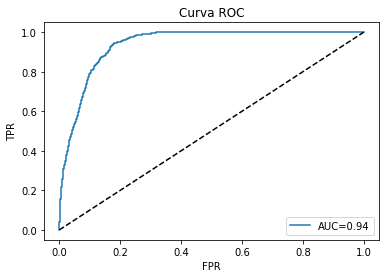

Mide capacidad del modelo para distinguir entre aprobados y rechazados.
TPR=True Positive Rate
FPR=False Positive Rate


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = modelo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()
print("Mide capacidad del modelo para distinguir entre aprobados y rechazados.")
print("TPR=True Positive Rate")
print("FPR=False Positive Rate")

Cuanto más se acerque la curva a la esquina superior izquierda mejor es el modelo (muchos verdaderos positivos y pocos falsos positivos) cada movimiento de la curva es un cambio en el umbral de decisión.
La línea diagonal punteada gris representa un modelo aleatorio que no tiene capacidad de predecir, por eso la curva ROC que este por encima representa que el modelo actual genera mejor informacion, que el modelo aprendió patrones útiles y tiene capacidad de discriminación mejor que la aleatoriedad.

## Validación cruzada (Cross-Validation)

La validación cruzada es una técnica para evaluar la capacidad de generalización del modelo, muestra cómo se comportará con datos que no ha visto. Sirve para detectar overfitting (cuando el modelo aprende demasiado los datos de entrenamiento y falla con datos nuevos).
- Divide los datos en k partes (folds).
- Entrena el modelo k veces: cada vez, uno de los folds sirve como conjunto de prueba y los otros k-1 como entrenamiento.
- Se promedian las métricas (accuracy, f1, AUC) para obtener un valor más robusto.

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo, X, y, cv=5, scoring='roc_auc')
print("AUC promedio:", scores.mean())


AUC promedio: 0.9342335564161353


<div class="alert alert-warning">Se obtiene un valor muy cercano a 1 lo que indica que el modelo predice de manera excelente, separando correctamente clientes riesgosos de los seguros. En otras palabras significa que si tomo un cliente aprobado y uno rechazado al azar, el modelo asignará una probabilidad más alta al aprobado en el 93.4% de los casos, lo que es significativamente superior al 50% que representaría una selección al azar.</div>

---
✍️ Autor: Néstor Díaz — Contador Público | Analista de Datos | Machine Learning

📅 Proyecto: Predicción de riesgo crediticio mediante regresión logística.

---